In [7]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from datetime import datetime
import pandas as pd
from scipy import stats,interpolate
import urllib
import plotly.express as px
import plotly.graph_objects as go


In [65]:
nao_x = np.load('nao_x.npy')
nao_y = np.load('nao_y.npy')
nao_szn_y = np.load('nao_szn_y.npy')
nao_years_y = np.load('nao_years_y.npy')
nao_dec_y = np.load('nao_dec_y.npy')

In [66]:
(nao_x.size * nao_x.itemsize / 1024) * 5

51.46484375

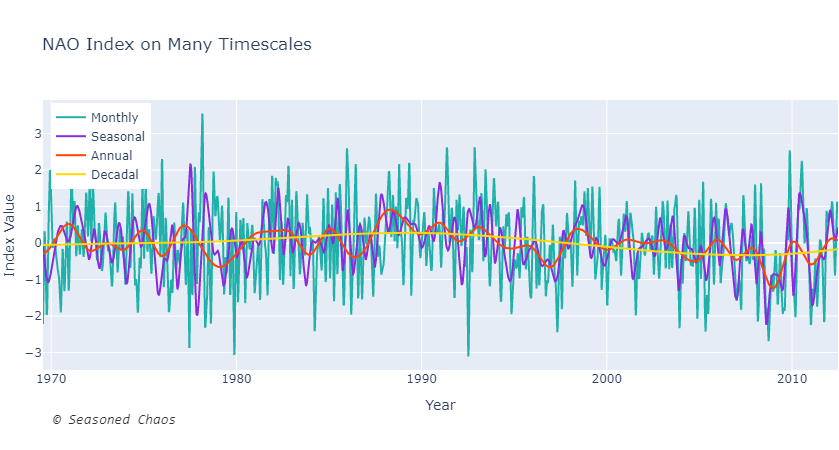

In [106]:
fig = go.Figure()

fig.add_trace(go.Scatter(x =nao_x, y = nao_y,
                    mode='lines',
                    marker=dict(color='lightseagreen'),
                    name='Monthly'))

fig.add_trace(go.Scatter(x=nao_x, y=nao_szn_y,
                    mode='lines',
                    marker=dict(color='blueviolet'),
                    name='Seasonal'))

fig.add_trace(go.Scatter(x=nao_x, y=nao_years_y,
                    mode='lines',
                    marker=dict(color='orangered'),
                    name='Annual'))

fig.add_trace(go.Scatter(x=nao_x, y=nao_dec_y,
                    mode='lines',
                    marker=dict(color='gold'),
                    name='Decadal'))

fig.update_layout(title='NAO Index on Many Timescales',
#                   autosize=False,
#                   height=200,
#                   width=420,
                  margin=dict(
                        r=0.99,
                        l=0.1
                    ),
                   xaxis_title='Year',
                   yaxis_title='Index Value',
                   xaxis = dict(
                   tickmode = 'array',
                   tickvals = [0,10,20,30,40,50,60,70],
                   ticktext = ['1950','1960','1970','1980','1990','2000','2010','2020']),
                   hovermode='x')

fig.update_traces(hoverinfo='y')

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
))

fig.add_annotation(
            x=.01,
            y=-.22,
            xref="paper",
            yref="paper",
            text="<i>\xa9 Seasoned Chaos</i>",
            showarrow=False, opacity=.8,
            font=dict(
                family="Dill Alternate,monospace",
                size=14,
                color="black"
            ))

In [71]:
import chart_studio
username = 'kelseymalloy' # your username
api_key = 'e8y5HEOtIknudBTUA88C' # your api key - go to profile > settings > regenerate key
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

In [107]:
import chart_studio.plotly as py
py.plot(fig, filename = 'nao_sounds', auto_open=False)

'https://plotly.com/~kelseymalloy/10/'

In [76]:
import chart_studio.tools as tls
tls.get_embed('https://plotly.com/~kelseymalloy/10/')

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plotly.com/~kelseymalloy/10.embed" height="525" width="100%"></iframe>'

In [84]:
import plotly.io as pio
pio.write_html(fig, file='../_pages/nao_sounds_SC.html', auto_open=True)